# Explore Data Science Academy Classification Hackathon Student Solution

© Explore Data Science Academy


# Overview
South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.
From South African Government

<img src="C:\Users\F5481295\OneDrive - FRG\Downloads\06 - Advanced Classification\LANGUAGE IDENTIFICATION CLASSIFICATION HACKATHON" width=400 height=400 />

With such a multilingual population, it is only obvious that our systems and devices also communicate in multi-languages.

In this challenge, we will take text which is in any of South Africa's 11 Official languages and identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Processing and Engineering</a>

<a href=#five>5. Model Development</a>

<a href=#six>6. Model Training and Testing</a>

<a href=#seven>7. Model Performance</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

In [1]:
# Libraries for loading data, data manipulation and data visulisation
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import re # Regular expression python module
import string

# nltk for preprocessing of text data
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

# Labraries for model builduing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, f1_score,

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [2]:
train = pd.read_csv('train_set.csv')
test = pd.read_csv('test_set.csv')

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [3]:
train.head(10) # To view the first 10 rows of the train set data

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
5,nso,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...
6,tsn,kgetse nngwe le nngwe e e sa faposiwang mo tsh...
7,ven,mbadelo dze dza laelwa dzi do kwama mahatulele...
8,nso,maloko a dikhuduthamaga a ikarabela mongwe le ...
9,tsn,fa le dirisiwa lebone le tshwanetse go bontsha...


The train dataset has 2 columns,which are `lang_id` and `text`. The `lang_id` column is the target variable and the `text` column contains the text that we will clean and preprocess.

In [4]:
test.tail(10) # To view the last 10 rows of the train set data

,index,text
5672,5673,Die raad kan van tyd tot tyd en in ooreenstemm...
5673,5674,halutshedzo ya ' tshiimo tsha u vha na vhudzim...
5674,5675,botlalo tšeo di hlokegago o mongwe le o mongwe.
5675,5676,Muanewa-muhali. Mafhungo o he a lungano a kwam...
5676,5677,Afitafiti go tšwa go leloko go netefatša tlhok...
5677,5678,You mark your ballot in private.
5678,5679,Ge o ka kgetha ka bowena go se šomiše Mofani k...
5679,5680,"E Ka kopo etsa kgetho ya hao ka hloko, hobane ..."
5680,5681,"TB ke bokudi ba PMB, mme Morero o tla lefella ..."
5681,5682,Vakatjhela iwebhusayidi yethu ku-www.


The test dataset  doesn't have the `lang_id` column because we want to build a Machine Learning model(s) that can classify a text into one of South Africa's 11 official languages, and we will use this data to test our model(s). 

In [5]:
#Understand the number of features and data points in the train dataset
train.shape

(33000, 2)

So we've got 33,000 samples (text), each with 2 features.

In [6]:
#Understand the number of features and data points in the test dataset
test.shape

(5682, 2)

For the test dataset we've got 5,682 samples (text), each with 2 features.

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


As we can see both the `lang_id` and `text` features have object data type. Later we will have to convert the `text` column from object data type into numeric data type since computers can't understand natural language. It also seems like the columns have no null values, but we can check just to be sure,

In [8]:
train.isnull().sum()

lang_id    0
text       0
dtype: int64

In [9]:
test.isnull().sum()

index    0
text     0
dtype: int64

Therefore, we can see that both the train set and test set data have no null values. Now let's look at the values that we have on the `lang_id` column and how are they distributed.

In [10]:
train['lang_id'].unique()

array(['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso',
       'sot', 'afr'], dtype=object)

In [11]:
train["lang_id"].value_counts()

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

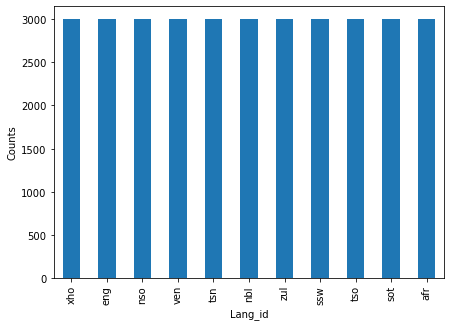

In [15]:
train['lang_id'].value_counts().plot(figsize=(7,5),kind='bar')
plt.xlabel('Lang_id')
plt.ylabel('Counts')
plt.show()

As we can see on the bar graph above, the language IDs have the same number of value counts. This means we are dealing with balanced data, which is the type of data we ideally want to work with to get better working models.

<a id="four"></a>
## 4. Data Processing and Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In this section we will conduct some basic steps of text preprocessing in order to transfer text from human language to machine readable format for further processing. We are going to create a function called `cleaning`, which will Pre-process the `text` column. The function will:
* make every letter lower case
* remove punctuation
* remove numbers
* remove whitespaces
* replace new line with space

In [16]:
def cleaning(text):
    text = text.lower()
    text = ''.join([x for x in text if x not in string.punctuation])
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub("\n"," ",text)
    text = ' '.join(text.split())
    
    return text 

Next, we will apply the cleaning function on both the train and test dataset to clean the `text` column.

In [17]:
train['clean_text'] = train['text'].apply(cleaning)
test['clean_text'] = test['text'].apply(cleaning)

In [18]:
train.head() # looking at the train dataset after cleaning

,lang_id,text,clean_text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulu-natal department of tr...,the province of kwazulunatal department of tra...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [19]:
test.head() # looking at the test datasetafter cleaning

,index,text,clean_text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele...",mmasepala fa maemo a a kgethegileng a letlelel...
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.,tshivhumbeo tshi fana na ngano dza vhathu
3,4,Kube inja nelikati betingevakala kutsi titsini...,kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.,winste op buitelandse valuta


After cleaning the `text` column, we will convert it from object data type to numeric data type using the **Tfidf Vectorizer**, so that we can be able to use it in the modelling section.

In [20]:
# Defining the feature and the label
X = train['clean_text']
y = train['lang_id']

In [21]:
vect = TfidfVectorizer(ngram_range=(1,2), min_df=2) # Defining the vectorizer
X_vect = vect.fit_transform(X) # Vectorizing the train dataset feature
test_vect = vect.transform(test['clean_text']) # Vectorizing the test dataset feature

In [22]:
print ("The Train set size ", X_vect.shape)
print ("The Test set size ", test_vect.shape)

The Train set size  (33000, 206620)
The Test set size  (5682, 206620)


<a id="five"></a>
## 5. Model development and Training
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Before we can begin with building our models we have to split the train data into **train** and **test** set.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=46)

After splitting the train dataset, we can proceed with training our models.

In [26]:
# Creating an instance of each model
log_r = LogisticRegression()
forest = RandomForestClassifier(n_estimators=100, random_state=42)
svc = SVC(kernel='linear')
naive_bayes = MultinomialNB()

# fitting each model
log_r.fit(X_train, y_train)
forest.fit(X_train, y_train)
svc.fit(X_train, y_train)
naive_bayes.fit(X_train, y_train)

# making predictions using each model
pred_log = log_r.predict(X_test)
pred_forest = forest.predict(X_test)
svc_pred = svc.predict(X_test)
pred_bayes = naive_bayes.predict(X_test)

<a id="seven"></a>
## 7. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In this section we are going to evaluate the performance of each model by looking at their classification reports and F1-scores.

In [36]:
print('Logistic Regression Classification Report')
print(classification_report(y_test, pred_log))
print('            ------------------------------')
print('Random Forest Classification Report')
print(classification_report(y_test, pred_forest))
print('            ------------------------------')
print('Support Vector Machine Classification Report')
print(classification_report(y_test, svc_pred))
print('            ------------------------------')
print('Naive Bayes Classification Report')
print(classification_report(y_test, pred_bayes))

Logistic Regression Classification Report
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       618
         eng       1.00      1.00      1.00       608
         nbl       0.99      0.99      0.99       607
         nso       1.00      1.00      1.00       603
         sot       1.00      1.00      1.00       611
         ssw       1.00      1.00      1.00       613
         tsn       1.00      1.00      1.00       611
         tso       1.00      1.00      1.00       588
         ven       1.00      1.00      1.00       604
         xho       0.99      1.00      1.00       576
         zul       0.98      0.98      0.98       561

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600

            ------------------------------
Random Forest Classification Report
              precision    recall  f1-score   support

         af

In [27]:
# F1_score for the Logistic Regression model
F1_log = f1_score(y_test, pred_log, average = 'weighted')
print("The F1_score of the Logistic Regression model is: {}".format(F1_log))

# F1_score for Random Forest model
F1_forest = f1_score(y_test, pred_forest, average = 'weighted')
print("The F1_score of the Random Forest model is: {}".format(F1_forest))

# F1_score for the Support Vector Machine model
F1_SVM = f1_score(y_test, svc_pred, average = 'weighted')
print("The F1_score of the Support Vector Machine model is: {}".format(F1_SVM))

# F1_score for the Naive Bayes model
F1_Bayes = f1_score(y_test, pred_bayes, average = 'weighted')
print("The F1_score of the Naive Bayes model is: {}".format(F1_Bayes))

The F1_score of the Logistic Regression model is: 0.9959074413108815
The F1_score of the Random Forest model is: 0.9903075048688084
The F1_score of the Support Vector Machine model is: 0.9972708843494191
The F1_score of the Naive Bayes model is: 0.998939245648597


From the above set of results, we can safely conclude that the best performing model is the Naive Bayes model. Furthermore, the Naive Bayes took a short period of time to train the model, compared to other models like Logistic Regression which took a significant amount of training time.